In [1]:
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import numpy as np
import os
from datetime import date
import datetime
from pathlib import Path
import seaborn as sns

In [2]:
caminho = r'Z:\Banco SIVEP Exportação'
lista_arquivos = os.listdir(caminho)
lista_datas = []

for arquivo in lista_arquivos:
    #Descobrir a data desse arquivo
    data = os.path.getmtime(f'{caminho}/{arquivo}')
    lista_datas.append((data,arquivo))

lista_datas.sort(reverse=True) #Vai ordenar a lista em ordem decrescente com reverse=True Obs: Ele ordena sempre com o primeiro valor, por isso colocamos data antes de arquivo
ultimo_arquivo = lista_datas[0][1] #Pega o ultimo arquivo
ultimo_arquivo

'Banco SIVEP 21_11_2022 07_32_59.xlsx'

In [3]:
if not os.path.exists(f'Z:\Graficos Boletim_Python/Gráficos {date.today().day}_{date.today().month}_{date.today().year}'):
    os.makedirs(f'Z:\Graficos Boletim_Python/Gráficos {date.today().day}_{date.today().month}_{date.today().year}')

In [4]:
dados = pd.read_excel(f'{caminho}/{ultimo_arquivo}')
#dados = pd.read_excel('Z:/Banco SIVEP Exportação/Banco SIVEP 30_05_2022 09_48_25.xlsx')

In [5]:
#Filtrando a tabela apenas com as colunas de interece
filtrado = dados[['Sem Epi Internacao','Classificacao final','Evolucao']]

In [6]:
teste = filtrado.loc[:4,['Sem Epi Internacao','Classificacao final']].sort_values(by='Sem Epi Internacao')
teste

,Sem Epi Internacao,Classificacao final
3,2021_05,COVID-19
1,2021_27,Não Informado
0,2021_51,Não Informado
2,NaN,Não Informado
4,NaN,COVID-19


In [7]:
#Filtrando a coluna Classificacao final apenas com valores de COVID-19
covid19 = filtrado.loc[filtrado['Classificacao final']=='COVID-19']
covid19 = covid19.dropna()

In [8]:
#utilizando covid19 e agrupando pela semana de internacao
contacasos = covid19.groupby('Sem Epi Internacao').count()
contacasos.head()

,Classificacao final,Evolucao
Sem Epi Internacao,,
2020_11,1,1
2020_12,19,19
2020_13,101,101
2020_14,111,111
2020_15,66,66


In [9]:
#Guardado em confirmado os valores da coluna 
confirmado = contacasos
confirmado = confirmado['Classificacao final']
confirmado

Sem Epi Internacao
2020_11      1
2020_12     19
2020_13    101
2020_14    111
2020_15     66
          ... 
2022_42     26
2022_43     27
2022_44     15
2022_45     27
2022_46     22
Name: Classificacao final, Length: 141, dtype: int64

In [10]:
#Filtrando os casos não informados
nao_informado = filtrado.loc[filtrado['Classificacao final']=='Não Informado'] #Valores da coluna Classificacao final apenas com valor Não Informado
nao_informado = nao_informado.dropna()
nao_informado = nao_informado.groupby('Sem Epi Internacao').count() #Agrupando pela semana de internacao
nao_informado = nao_informado.merge(contacasos, how =  'outer', left_index = True, right_index = True) #Juntando os dataframes nao_informado com o contacasos para ter o mesmo numero de linha com base na semana de internacao
nao_informado = nao_informado.fillna(0) #O que está com valor NaN recebe o valor 0
nao_informado = nao_informado['Classificacao final_x'] 
nao_informado

Sem Epi Internacao
2020_11     0.0
2020_12     0.0
2020_13     0.0
2020_14     0.0
2020_15     0.0
           ... 
2022_42    12.0
2022_43     4.0
2022_44     9.0
2022_45    22.0
2022_46    24.0
Name: Classificacao final_x, Length: 141, dtype: float64

In [11]:
#Filtrando os casos de SRAG
srag = filtrado
srag['Classificacao final'] = srag['Classificacao final'].map(lambda x: str(x)[0:4]) #Como tem SRAG... utilizamos isso para pegar apenas os 4 primeiros caracteres, no caso SRAG
srag = srag.loc[srag['Classificacao final']=='SRAG'] #Valores da coluna Classificacao final apenas com valores SRAG
srag = srag.groupby('Sem Epi Internacao').count() #Agrupa pela semana de internacao
srag = srag.drop(['2020_01','2020_02','2020_03','2020_04','2020_05','2020_06','2020_07',
        '2020_08','2020_09','2020_10']) #Dropando as semanas de internacao que nao sao de interesse
srag = srag.merge(contacasos,how='outer',left_index=True,right_index=True)
srag = srag.fillna(0)
srag = srag['Classificacao final_x']
srag

C:\Users\ryan-rosa\AppData\Local\Temp\ipykernel_15452\3504725454.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  srag['Classificacao final'] = srag['Classificacao final'].map(lambda x: str(x)[0:4]) #Como tem SRAG... utilizamos isso para pegar apenas os 4 primeiros caracteres, no caso SRAG


Sem Epi Internacao
2020_11     46
2020_12    135
2020_13    496
2020_14    493
2020_15    423
          ... 
2022_42    162
2022_43    139
2022_44    111
2022_45     76
2022_46     30
Name: Classificacao final_x, Length: 141, dtype: int64

In [12]:
#Criando o eixo x com os valores da semana de internacao
semana = covid19.sort_values('Sem Epi Internacao',ascending=True) #Coloca a coluna semana de internacao em ordem crescente de valores
semana = semana.groupby('Sem Epi Internacao').count()
semana = semana.reset_index() #Reseta o index
semana = semana['Sem Epi Internacao']
semana

0      2020_11
1      2020_12
2      2020_13
3      2020_14
4      2020_15
        ...   
136    2022_42
137    2022_43
138    2022_44
139    2022_45
140    2022_46
Name: Sem Epi Internacao, Length: 141, dtype: object

In [13]:
#Cria o eixo y de 0 a 6600 em intervalos de 700
eixoy = np.arange(0,7300,700)

In [14]:
#Pega o tamanho da variavel tamanho e faz com que o eixo x pule os valores de 2 em 2
tamanho_semana = np.size(semana)
eixo_x = np.arange(0,tamanho_semana,2)

In [15]:
#Cria a legenda para o grafico
legenda = pd.DataFrame(columns = ['Covid-19 confirmado','Covid-19 descartado','Em investigação'])

In [16]:
pasta = r'Z:\Graficos Boletim_Python'
lista_arquivos = os.listdir(pasta)
lista_datas = []

for arquivo in lista_arquivos:
    #Descobrir a data desse arquivo
    data = os.path.getmtime(f'{pasta}/{arquivo}')
    lista_datas.append((data,arquivo))

lista_datas.sort(reverse=True) #Vai ordenar a lista em ordem decrescente com reverse=True Obs: Ele ordena sempre com o primeiro valor, por isso colocamos data antes de arquivo
ultima_pasta = lista_datas[0][1] #Pega o ultimo arquivo
ultima_pasta

'Gráficos 21_11_2022'

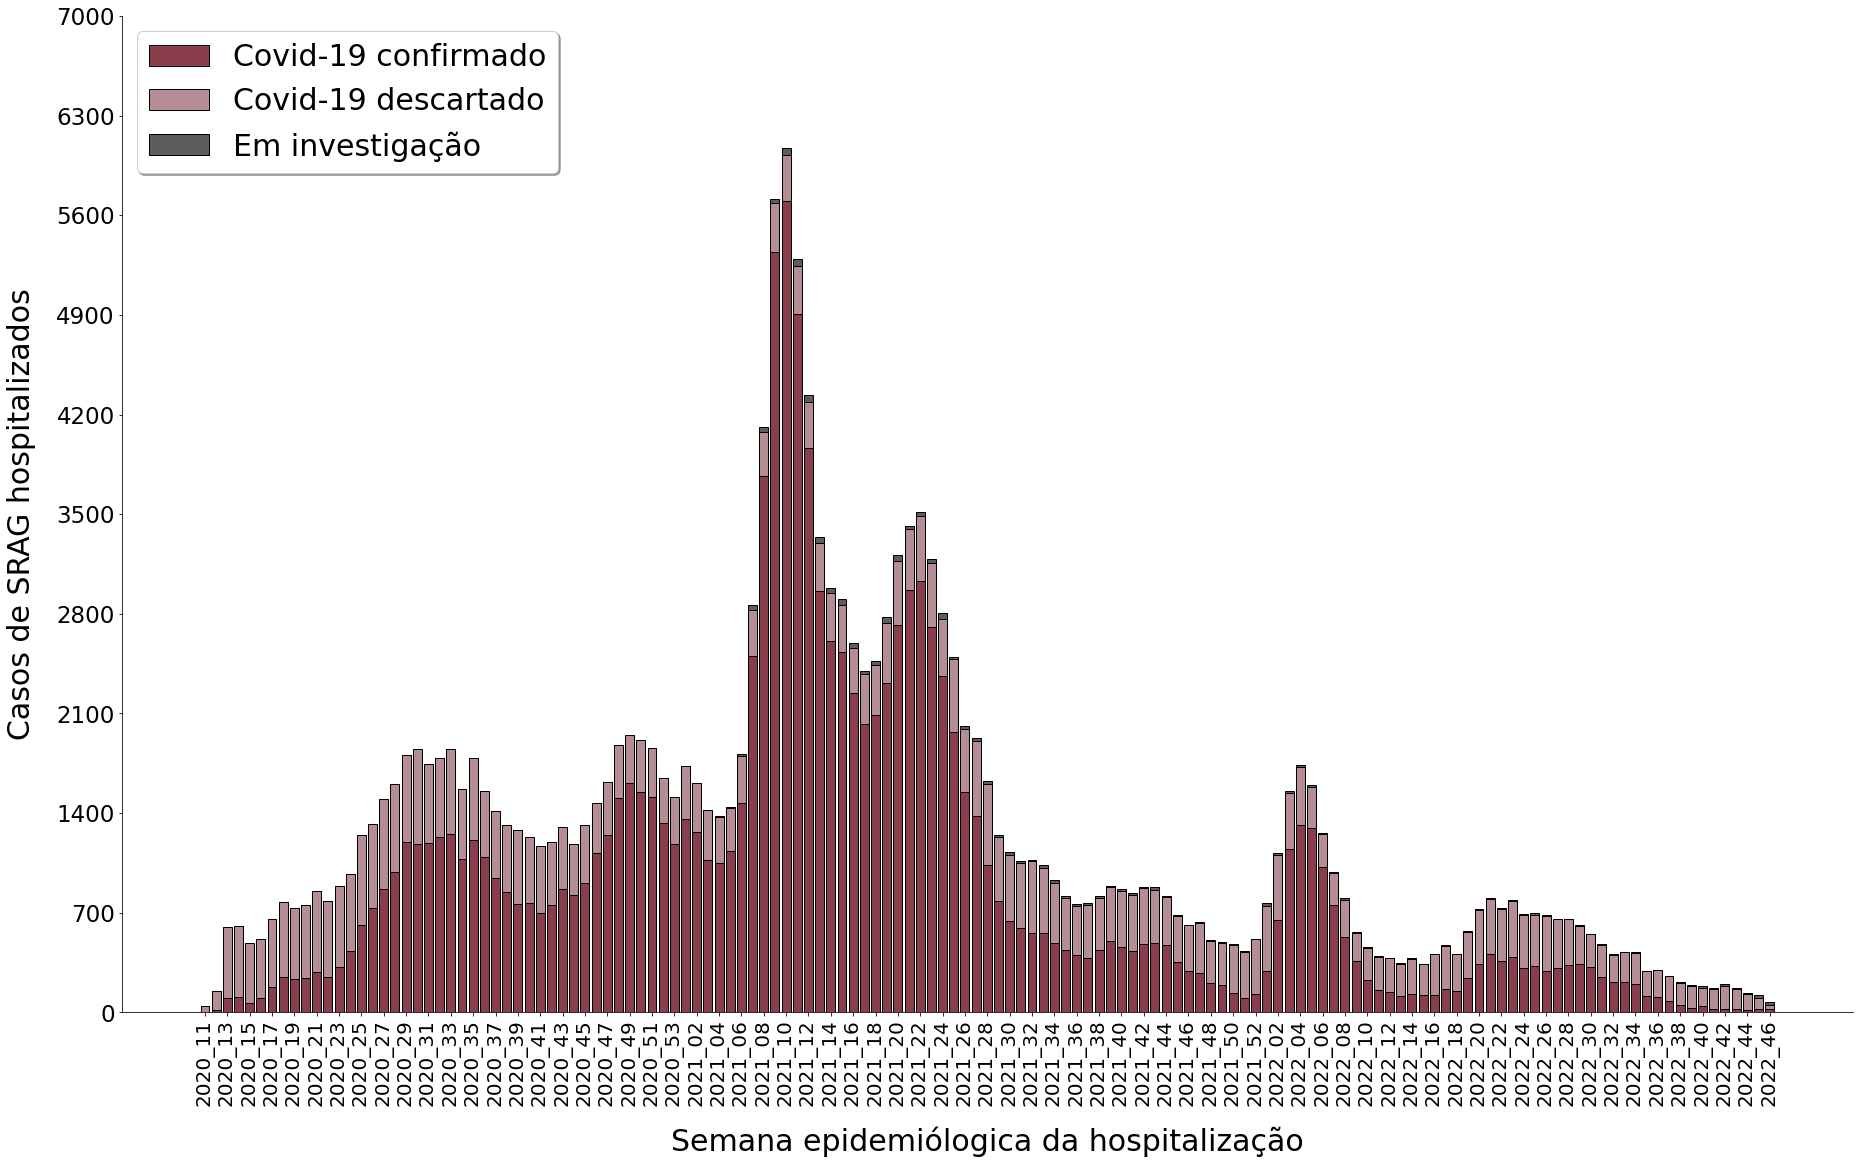

In [17]:
#Plotagem do grafico
plt.figure(figsize=(tamanho_semana*0.22,tamanho_semana*0.13))
plt.bar(semana,confirmado, color='#8a3e4b',edgecolor='#000000')
plt.bar(semana,srag, bottom=confirmado, color = '#b58d94',edgecolor='#000000')
plt.bar(semana,nao_informado, bottom = np.array(confirmado)+np.array(srag), color = '#5e5d5d',edgecolor='#000000')
sns.despine()
plt.legend(legenda, fontsize=30,shadow=True,loc='upper left')
#plt.annotate('Primeiro caso\nhospitalizado por\nCOVID-19 no RS',xy=(3,620),xytext=(2,1500),arrowprops=dict(arrowstyle='->',connectionstyle='arc3'),fontsize=15,
#                bbox=dict(fc="white", ec="#000000", lw=1,pad=10))
plt.xticks(eixo_x)
plt.xticks(rotation=90,fontsize=20)
plt.yticks(eixoy,fontsize=23)
plt.xlabel('Semana epidemiólogica da hospitalização',labelpad=20,fontsize=30)
plt.ylabel('Casos de SRAG hospitalizados',labelpad=20,fontsize=30)
plt.savefig(f'Z:/Graficos Boletim_Python/{ultima_pasta}/casosSRAG_Hosp.png',dpi=720,bbox_inches='tight')

In [18]:
zoomConfirmado = confirmado.to_frame()
zoomConfirmado = zoomConfirmado['2022_01':]
zoomConfirmado = zoomConfirmado['Classificacao final']
zoomConfirmado

Sem Epi Internacao
2022_01     290
2022_02     646
2022_03    1150
2022_04    1319
2022_05    1297
2022_06    1025
2022_07     752
2022_08     532
2022_09     360
2022_10     227
2022_11     159
2022_12     144
2022_13     117
2022_14     127
2022_15     120
2022_16     123
2022_17     165
2022_18     148
2022_19     245
2022_20     341
2022_21     412
2022_22     362
2022_23     390
2022_24     313
2022_25     326
2022_26     294
2022_27     312
2022_28     334
2022_29     338
2022_30     318
2022_31     251
2022_32     214
2022_33     214
2022_34     203
2022_35     117
2022_36     107
2022_37      79
2022_38      50
2022_39      33
2022_40      44
2022_41      25
2022_42      26
2022_43      27
2022_44      15
2022_45      27
2022_46      22
Name: Classificacao final, dtype: int64

In [19]:
zoomSrag = srag.to_frame()
zoomSrag = zoomSrag['2022_01':]
zoomSrag = zoomSrag.reset_index()
zoomSrag = zoomSrag.set_index('Sem Epi Internacao')
#zoomSrag = zoomSrag.reset_index()
zoomSrag = zoomSrag['Classificacao final_x']
zoomSrag.tail()

Sem Epi Internacao
2022_42    162
2022_43    139
2022_44    111
2022_45     76
2022_46     30
Name: Classificacao final_x, dtype: int64

In [20]:
zoomNaoInformado = nao_informado.to_frame()
zoomNaoInformado = zoomNaoInformado['2022_01':]
zoomNaoInformado = zoomNaoInformado.reset_index()

In [21]:
semana = zoomNaoInformado['Sem Epi Internacao']
semana.tail()

41    2022_42
42    2022_43
43    2022_44
44    2022_45
45    2022_46
Name: Sem Epi Internacao, dtype: object

In [22]:
zoomNaoInformado = zoomNaoInformado['Classificacao final_x']
zoomNaoInformado

0     17.0
1     12.0
2     13.0
3     19.0
4     17.0
5      8.0
6      9.0
7     18.0
8      7.0
9      8.0
10     7.0
11     2.0
12     2.0
13     3.0
14     3.0
15     1.0
16     4.0
17     5.0
18    10.0
19    12.0
20     7.0
21     8.0
22     4.0
23     8.0
24     9.0
25     7.0
26     4.0
27     1.0
28     4.0
29     3.0
30     5.0
31     5.0
32     2.0
33     4.0
34     3.0
35     1.0
36     4.0
37     6.0
38     7.0
39    10.0
40     8.0
41    12.0
42     4.0
43     9.0
44    22.0
45    24.0
Name: Classificacao final_x, dtype: float64

In [23]:
#zoomConfirmado = zoomConfirmado['Classificacao final']
#zoomSrag = zoomSrag['Classificacao final_x']
#zoomNaoInformado = zoomNaoInformado['Classificacao final_x']

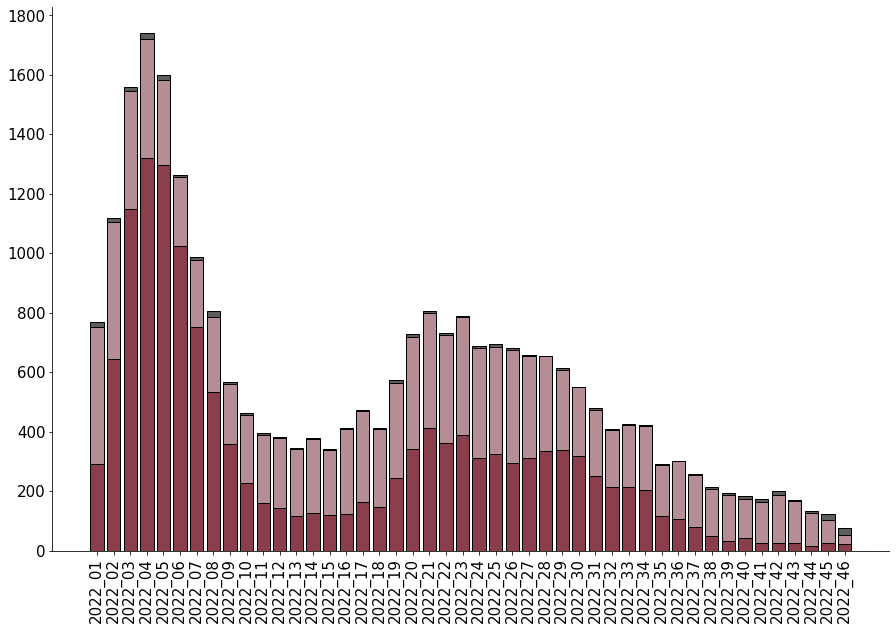

In [25]:
plt.figure(figsize=(15,10))
width=0.8
plt.bar(semana,zoomConfirmado,width,color='#8a3e4b',edgecolor='#000000')
plt.bar(semana,zoomSrag,width,bottom=zoomConfirmado,color = '#b58d94',edgecolor='#000000')
plt.bar(semana,zoomNaoInformado,width,bottom=zoomConfirmado+zoomSrag,color = '#5e5d5d',edgecolor='#000000')
sns.despine()
plt.xticks(fontsize=15,rotation=90)
plt.yticks(np.arange(0,2000,200),fontsize=15)
plt.savefig(f'Z:/Graficos Boletim_Python/{ultima_pasta}/casosSRAG_HospZoom.png',dpi=720,bbox_inches='tight')